In [1]:
pip install Bio crosslingual_coreference rdflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.6/719.6 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.2/463.2 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [2]:
!python -m spacy download en_core_web_sm

2024-06-07 11:58:05.908087: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-07 11:58:05.908151: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-07 11:58:05.909777: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-07 11:58:05.919566: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-07 11:58:07.501381: W tensorflow/compiler/tf2

In [3]:

from Bio import Entrez

def search(query, max_papers=5):
    """
    Get IDs of papers on the given topic from the PubMed database.
    """
    handle = Entrez.esearch(
        db='pubmed',
        sort='relevance',
        retmax=max_papers,
        retmode='xml',
        term=query
    )
    results = Entrez.read(handle)
    return results

def fetch_details(id_list):
    """
    Get details on each paper (including the abstract).
    """
    ids = ','.join(id_list)
    handle = Entrez.efetch(
        db='pubmed',
        retmode='xml',
        id=ids
    )
    results = Entrez.read(handle)
    return results

# Search for papers on Psoriasis
results = search('Psoriasis')
id_list = results['IdList']
papers = fetch_details(id_list)

# Print the content of the papers
for paper in papers['PubmedArticle']:
    article = paper['MedlineCitation']['Article']
    title = article['ArticleTitle']
    abstract = article['Abstract']['AbstractText'][0] if 'Abstract' in article else 'No abstract available'

    print(f"Title: {title}")
    print(f"Abstract: {abstract}")
    print("\n" + "-"*80 + "\n")




/usr/local/lib/python3.10/dist-packages/Bio/Entrez/__init__.py:723: UserWarning: 
            Email address is not specified.

            To make use of NCBI's E-utilities, NCBI requires you to specify your
            email address with each request.  As an example, if your email address
            is A.N.Other@example.com, you can specify it as follows:
               from Bio import Entrez
               Entrez.email = 'A.N.Other@example.com'
            In case of excessive usage of the E-utilities, NCBI will attempt to contact
            a user at the email address provided before blocking access to the
            E-utilities.
  warnings.warn(


Title: Psoriasis.
Abstract: Psoriasis is an immune-mediated, genetic disease manifesting in the skin or joints or both. A diverse team of clinicians with a range of expertise is often needed to treat the disease. Psoriasis provides many challenges including high prevalence, chronicity, disfiguration, disability, and associated comorbidity. Understanding the role of immune function in psoriasis and the interplay between the innate and adaptive immune system has helped to manage this complex disease, which affects patients far beyond the skin. In this Seminar, we highlight the clinical diversity of psoriasis and associated comorbid diseases. We describe recent developments in psoriasis epidemiology, pathogenesis, and genetics to better understand present trends in psoriasis management. Our key objective is to raise awareness of the complexity of this multifaceted disease, the potential of state-of-the-art therapeutic approaches, and the need for early diagnosis and comprehensive manageme

In [4]:
import spacy
import crosslingual_coreference

# Device configuration
DEVICE = -1  # Use -1 for CPU, or the GPU number if you want to use GPU

# Load the coreference resolution model
coref = spacy.load(
    'en_core_web_sm',
    disable=['ner', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer']
)
coref.add_pipe(
    "xx_coref",
    config={"chunk_size": 2500, "chunk_overlap": 2, "device": DEVICE}
)

# Example sentences to test coreference resolution
examples = [
    "Alice went to the park. She enjoyed her time there.",
    "Bob and his dog went for a walk. They saw a beautiful sunset.",
    "The book was on the table. It was very interesting."
]

# Process each example and print the results
for example in examples:
    doc = coref(example)
    print(f"Original: {example}")
    print(f"Resolved: {doc._.resolved_text}")
    print("\n" + "-"*80 + "\n")


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
models/crosslingual-coreference/minilm/model.tar.gz: 358490KB [00:15, 23660.41KB/s]                            
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Downloading:   0%|          | 0.00/357 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/489 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/225M [00:00<?, ?B/s]

Some weights of the model checkpoint at nreimers/mMiniLMv2-L12-H384-distilled-from-XLMR-Large were not used when initializing XLMRobertaModel: ['lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaModel were not initialized from the model checkpoint at nreimers/mMiniLMv2-L12-H384-distilled-from-XLMR-Large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-st

Original: Alice went to the park. She enjoyed her time there.
Resolved: Alice went to the park. Alice enjoyed Alice's time there.

--------------------------------------------------------------------------------

Original: Bob and his dog went for a walk. They saw a beautiful sunset.
Resolved: Bob and his dog went for a walk. Bob and his dog saw a beautiful sunset.

--------------------------------------------------------------------------------

Original: The book was on the table. It was very interesting.
Resolved: The book was on the table. The book was very interesting.

--------------------------------------------------------------------------------



In [5]:
import requests
import re
import hashlib
from spacy import Language
from typing import List
import pandas as pd
from spacy.tokens import Doc, Span
from transformers import pipeline


import requests
import pandas as pd
from difflib import SequenceMatcher

def fetch_ontology_data(item, ontology):
    """
    Fetches data from the specified ontology API (snomed-ct or ncit).
    """
    url = f"https://www.ebi.ac.uk/ols/api/search?q={item}&ontology={ontology}"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for HTTP errors
        data = response.json().get('response').get('docs')
        return data if data else []
    except Exception as e:
        print(f"Error retrieving data from {ontology} API: {e}")
        return []

def similarity(a, b):
    """
    Calculates the similarity ratio between two strings using SequenceMatcher.
    """
    return SequenceMatcher(None, a, b).ratio()

def score_result(result, query):
    """
    Scores a result based on the similarity of its label and description to the query.
    """
    label = result.get('label', '')
    description = ' '.join(result.get('description', '')) if result.get('description') else ''
    label_score = similarity(label, query)
    description_score = similarity(description, query)
    return label_score + description_score

def get_best_result(item):
    """
    Fetches data from SNOMED-CT, NCIT, LOINC and NDF APIs and returns the best result based on scoring.
    """
    ontologies = ['snomed-ct', 'ncit', 'doid', 'icd','ndf','loinc','go','obo','omim']
    best_result = None
    best_score = 0

    for ontology in ontologies:
        ontology_data = fetch_ontology_data(item, ontology)
        for result in ontology_data:
            score = score_result(result, item)
            if score > best_score:
                best_score = score
                best_result = result

    return best_result['label'] if best_result else 'id-less'




def extract_triplets(text):
    """
    Function to parse the generated text and extract the triplets
    """
    triplets = []
    relation, subject, relation, object_ = '', '', '', ''
    text = text.strip()
    current = 'x'
    for token in text.replace("<s>", "").replace("<pad>", "").replace("</s>", "").split():
        if token == "<triplet>":
            current = 't'
            if relation != '':
                triplets.append({'head': subject.strip(), 'type': relation.strip(),'tail': object_.strip()})
                relation = ''
            subject = ''
        elif token == "<subj>":
            current = 's'
            if relation != '':
                triplets.append({'head': subject.strip(), 'type': relation.strip(),'tail': object_.strip()})
            object_ = ''
        elif token == "<obj>":
            current = 'o'
            relation = ''
        else:
            if current == 't':
                subject += ' ' + token
            elif current == 's':
                object_ += ' ' + token
            elif current == 'o':
                relation += ' ' + token
    if subject != '' and relation != '' and object_ != '':
        triplets.append({'head': subject.strip(), 'type': relation.strip(),'tail': object_.strip()})

    return triplets

@Language.factory(
    "rebel",
    requires=["doc.sents"],
    assigns=["doc._.rel"],
    default_config={
        "model_name": "Babelscape/rebel-large",
        "device": 0,
    },
)
class RebelComponent:
    def __init__(
        self,
        nlp,
        name,
        model_name: str,
        device: int,
    ):
        assert model_name is not None, ""
        self.triplet_extractor = pipeline("text2text-generation", model=model_name, tokenizer=model_name, device=device)
        self.entity_mapping = {}
        # Register custom extension on the Doc
        if not Doc.has_extension("rel"):
          Doc.set_extension("rel", default={})

    def get_term_id(self, item: str):
        mapping = self.entity_mapping.get(item)
        if mapping:
          return mapping
        else:
          res = get_best_result(item)
          self.entity_mapping[item] = res
          return res


    def _generate_triplets(self, sent: Span) -> List[dict]:
          output_ids = self.triplet_extractor(sent.text, return_tensors=True, return_text=False)[0]["generated_token_ids"]["output_ids"]
          extracted_text = self.triplet_extractor.tokenizer.batch_decode(output_ids[0])
          extracted_triplets = extract_triplets(extracted_text[0])
          return extracted_triplets

    def set_annotations(self, doc: Doc, triplets: List[dict]):
        for triplet in triplets:

            # Remove self-loops (relationships that start and end at the entity)
            if triplet['head'] == triplet['tail']:
                continue

            # Use regex to search for entities
            head_span = re.search(triplet["head"], doc.text)
            tail_span = re.search(triplet["tail"], doc.text)

            # Skip the relation if both head and tail entities are not present in the text
            # Sometimes the Rebel model hallucinates some entities
            if not head_span or not tail_span:
              continue

            index = hashlib.sha1("".join([triplet['head'], triplet['tail'], triplet['type']]).encode('utf-8')).hexdigest()
            if index not in doc._.rel:

                doc._.rel[index] = {"relation": triplet["type"], "head_span": {'text': triplet['head'], 'id': self.get_term_id(triplet['head'])}, "tail_span": {'text': triplet['tail'], 'id': self.get_term_id(triplet['tail'])}}

    def __call__(self, doc: Doc) -> Doc:
        for sent in doc.sents:
            sentence_triplets = self._generate_triplets(sent)
            self.set_annotations(doc, sentence_triplets)
        return doc

# Example usage
nlp = spacy.blank("en")

rel_ext = spacy.load(
    'en_core_web_sm',
    disable=['ner', 'lemmatizer', 'attribute_rules', 'tagger']
)
rel_ext.add_pipe(
    "rebel",
    config={
        'device':DEVICE, # Number of the GPU, -1 if want to use CPU
        'model_name':'Babelscape/rebel-large' # Model used
    }
)

input_text = "High fever is very dangerous. It can be treated with paracetamol, which is in turn a powerful drug."

# Coreference model
coref_text = coref(input_text)._.resolved_text

# Entity and relations extraction
doc = rel_ext(coref_text)

for value, rel_dict in doc._.rel.items():
    print(f"{value}: {rel_dict}")


Downloading:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.51G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/123 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/344 [00:00<?, ?B/s]

0440ea848947d2677bc11443f99f20f67ce0a1bc: {'relation': 'subclass of', 'head_span': {'text': 'High fever', 'id': 'Have Fever'}, 'tail_span': {'text': 'dangerous', 'id': 'Dangerous plans'}}
8aa25d264897bd007d389890b2239c2b9c07fa0b: {'relation': 'drug used for treatment', 'head_span': {'text': 'High fever', 'id': 'Have Fever'}, 'tail_span': {'text': 'paracetamol', 'id': 'paracetamol'}}
d91bef9bfc94439523675b5d6a62e1f4635c0cdd: {'relation': 'medical condition treated', 'head_span': {'text': 'paracetamol', 'id': 'paracetamol'}, 'tail_span': {'text': 'High fever', 'id': 'Have Fever'}}


In [6]:
input_text = "Chronic obstructive pulmonary disease (COPD), often caused by long-term exposure to cigarette smoke or air pollution, is characterized by symptoms such as shortness of breath, coughing, and wheezing. Bronchodilators and corticosteroids are commonly prescribed medications to manage COPD symptoms and improve lung function."

# Coreference model
coref_text = coref(input_text)._.resolved_text

# Entity and relations extraction
doc = rel_ext(coref_text)

for value, rel_dict in doc._.rel.items():
    print(f"{value}: {rel_dict}")

414c563af473a6b5e357807175c9b137bf4ad5fb: {'relation': 'has cause', 'head_span': {'text': 'Chronic obstructive pulmonary disease', 'id': 'Chronic Obstructive Pulmonary Disease with Acute Exacerbation'}, 'tail_span': {'text': 'cigarette smoke', 'id': 'Cigarette Smoker'}}
e950b8573cdcbaabdc51a6cf28874511248a19e2: {'relation': 'has effect', 'head_span': {'text': 'cigarette smoke', 'id': 'Cigarette Smoker'}, 'tail_span': {'text': 'Chronic obstructive pulmonary disease', 'id': 'Chronic Obstructive Pulmonary Disease with Acute Exacerbation'}}
fefe69fb11e49c6d11b882febc4fb3d80d3ea20d: {'relation': 'medical condition treated', 'head_span': {'text': 'Bronchodilator', 'id': 'Bronchodilator'}, 'tail_span': {'text': 'Chronic obstructive pulmonary disease', 'id': 'Chronic Obstructive Pulmonary Disease with Acute Exacerbation'}}
dbed49f2aa09b350cc8f536ca323a79d6519bb55: {'relation': 'medical condition treated', 'head_span': {'text': 'corticosteroid', 'id': 'Corticosteroid'}, 'tail_span': {'text': 'C

In [7]:
from rdflib import Graph
from rdflib import URIRef, BNode, Literal, Namespace
import json

def Capitalise_underscore(relation):
  """
  Write the relations in Capitalized_And_Underscored_form
  """
  return relation.capitalize().replace(' ','_')
# Modify the ontology parameter in the API call
def ontologies_iri(item):
    """
    Fetches data from SNOMED-CT, NCIT, and NDF APIs and returns the best result based on scoring.
    """
    ontologies = ['snomed-ct', 'ncit', 'ndf','loinc','go','obo']
    best_result = None
    best_score = 0

    for ontology in ontologies:
        ontology_data = fetch_ontology_data(item, ontology)
        for result in ontology_data:
            score = score_result(result, item)
            if score > best_score:
                best_score = score
                best_result = result

    return best_result['label'] if best_result else 'id-less'

# Create the graph
g = Graph()
EX = Namespace('http://example.org/')

# DataFrame storing the trios for visual clarity
relations = pd.DataFrame()

for i, paper in enumerate(papers['PubmedArticle']):
    print("{}) {}".format(i + 1, paper['MedlineCitation']['Article']['ArticleTitle']))
    # Get abstract
    abstract_text_json = json.dumps(papers['PubmedArticle'][i]['MedlineCitation']['Article']['Abstract']['AbstractText'])
    abstract_text = ' '.join(json.loads(abstract_text_json))

    # Take through coreference model
    coref_text = coref(abstract_text)._.resolved_text

    # Entity extraction and linking
    doc = rel_ext(coref_text)

    # Debugging: Print the contents of doc._.rel
    print(f"Document Relations: {doc._.rel}")

    # Adding trios to the graph
    for value, rel_dict in doc._.rel.items():
        subject_iri = ontologies_iri(rel_dict['head_span']['text'])
        object_iri = ontologies_iri(rel_dict['tail_span']['text'])
        if subject_iri != 'id-less':
            subj = URIRef(subject_iri)
        else:
            subj = EX[rel_dict['head_span']['text']]
        if object_iri != 'id-less':
            obj = URIRef(object_iri)
        else:
            obj = EX[rel_dict['tail_span']['text']]
        pred = EX[Capitalise_underscore(rel_dict['relation'])]
        g.add((subj, pred, obj))

    # Convert the relations to a DataFrame
    if doc._.rel:  # Check if doc._.rel is not empty
        df = pd.DataFrame.from_dict(doc._.rel).transpose()
        print(f"DataFrame: {df.head()}")  # Print the first few rows of the DataFrame for debugging

        if 'head_span' in df.columns and 'tail_span' in df.columns:
            df['subject_text'] = df['head_span'].apply(lambda x: x['text'])
            df['subject_id'] = df['head_span'].apply(lambda x: x['id'])
            df['object_text'] = df['tail_span'].apply(lambda x: x['text'])
            df['object_id'] = df['tail_span'].apply(lambda x: x['id'])

            df.drop(["head_span", "tail_span"], axis=1, inplace=True)

            relations = pd.concat([relations, df])
        else:
            print("Error: Expected columns 'head_span' and 'tail_span' not found in DataFrame.")
    else:
        print("Error: doc._.rel is empty or not structured as expected.")


1) Psoriasis.
Document Relations: {'54bad2a537093d36edccb69eeb3f0cc57de06b85': {'relation': 'instance of', 'head_span': {'text': 'Psoriasis', 'id': 'Psoriasis'}, 'tail_span': {'text': 'disease', 'id': 'Disease'}}, '2c4f78efebbf19c7a8cca96a656279c446b005c0': {'relation': 'has cause', 'head_span': {'text': 'Psoriasis', 'id': 'Psoriasis'}, 'tail_span': {'text': 'comorbidity', 'id': 'Comorbidity'}}, 'eedfe4404a45d5df6b4eca93331cdf6ba290ec30': {'relation': 'has effect', 'head_span': {'text': 'comorbidity', 'id': 'Comorbidity'}, 'tail_span': {'text': 'Psoriasis', 'id': 'Psoriasis'}}, 'e436cc8c7c13f4b3d63891848e559849123797d1': {'relation': 'subclass of', 'head_span': {'text': 'innate', 'id': 'innate immune response'}, 'tail_span': {'text': 'immune system', 'id': 'immune system'}}, '8753755fcb49776c8f7c44514c2e27deafa14d90': {'relation': 'subclass of', 'head_span': {'text': 'adaptive', 'id': 'Adaptive Design'}, 'tail_span': {'text': 'immune system', 'id': 'immune system'}}, 'a8e16825476481831

DataFrame:                                              relation  \
54bad2a537093d36edccb69eeb3f0cc57de06b85  instance of   
2c4f78efebbf19c7a8cca96a656279c446b005c0    has cause   
eedfe4404a45d5df6b4eca93331cdf6ba290ec30   has effect   
e436cc8c7c13f4b3d63891848e559849123797d1  subclass of   
8753755fcb49776c8f7c44514c2e27deafa14d90  subclass of   

                                                                                  head_span  \
54bad2a537093d36edccb69eeb3f0cc57de06b85           {'text': 'Psoriasis', 'id': 'Psoriasis'}   
2c4f78efebbf19c7a8cca96a656279c446b005c0           {'text': 'Psoriasis', 'id': 'Psoriasis'}   
eedfe4404a45d5df6b4eca93331cdf6ba290ec30       {'text': 'comorbidity', 'id': 'Comorbidity'}   
e436cc8c7c13f4b3d63891848e559849123797d1  {'text': 'innate', 'id': 'innate immune respon...   
8753755fcb49776c8f7c44514c2e27deafa14d90      {'text': 'adaptive', 'id': 'Adaptive Design'}   

                                                                           

DataFrame:                                             relation  \
2e9135dc5b244d1fcf1f9da29889f5ff7c670c21  studied by   
ded7ce617e8f4b27e17c06945d9befe25d56900c     studies   
885fcd767af6828e36f9109566e44f99872ce1ea  has effect   
ca479e3f6825f3cb9ffd2d59b06a5ede4fea7491  has effect   
fa18fc991a36bdf65dfc9d9af26cfafd4eb7a143  has effect   

                                                                                  head_span  \
2e9135dc5b244d1fcf1f9da29889f5ff7c670c21           {'text': 'psoriasis', 'id': 'Psoriasis'}   
ded7ce617e8f4b27e17c06945d9befe25d56900c   {'text': 'skin biology', 'id': 'Marine Biology'}   
885fcd767af6828e36f9109566e44f99872ce1ea                      {'text': 'IL-23', 'id': '23'}   
ca479e3f6825f3cb9ffd2d59b06a5ede4fea7491  {'text': 'Th17', 'id': 'T-helper 17 cell chemo...   
fa18fc991a36bdf65dfc9d9af26cfafd4eb7a143     {'text': 'inflammatory', 'id': 'Inflammatory'}   

                                                                                 

DataFrame:                                              relation  \
42e153dab9eacce7a823e3cd7263aa3a10f4e570  subclass of   
e436cc8c7c13f4b3d63891848e559849123797d1  subclass of   
8753755fcb49776c8f7c44514c2e27deafa14d90  subclass of   
b14af7a2bc0a6456ebc41c21906853939a321955  subclass of   
72b76de0ac1ae279997c0b24b6e041dc422ce45e   has effect   

                                                                                  head_span  \
42e153dab9eacce7a823e3cd7263aa3a10f4e570           {'text': 'Psoriasis', 'id': 'Psoriasis'}   
e436cc8c7c13f4b3d63891848e559849123797d1  {'text': 'innate', 'id': 'innate immune respon...   
8753755fcb49776c8f7c44514c2e27deafa14d90      {'text': 'adaptive', 'id': 'Adaptive Design'}   
b14af7a2bc0a6456ebc41c21906853939a321955         {'text': 'macrophage', 'id': 'macrophage'}   
72b76de0ac1ae279997c0b24b6e041dc422ce45e  {'text': 'triggering factors', 'id': 'Dietary ...   

                                                                           

DataFrame:                                              relation  \
f932b4c6ab993e9e6d1a863bb57cc431e0bcd529  subclass of   
99fef88893700a02460788d78bad40db2efd7270    has cause   
6a76d26364b5f92d72d3ce1772c5ee2c1dbc98d0   has effect   
bcd2f7bf342036fe029f35703bb89597bbcce8ef     has part   
3eb87fe2185071b3b76756fb9f8ea55555d757f6      part of   

                                                                                  head_span  \
f932b4c6ab993e9e6d1a863bb57cc431e0bcd529           {'text': 'Psoriasis', 'id': 'Psoriasis'}   
99fef88893700a02460788d78bad40db2efd7270           {'text': 'psoriasis', 'id': 'Psoriasis'}   
6a76d26364b5f92d72d3ce1772c5ee2c1dbc98d0       {'text': 'HLA-Cw6', 'id': 'HLA-Cw6 antigen'}   
bcd2f7bf342036fe029f35703bb89597bbcce8ef  {'text': 'chromosomal', 'id': 'Chromosomal Loss'}   
3eb87fe2185071b3b76756fb9f8ea55555d757f6  {'text': 'susceptibility loci', 'id': 'Suscept...   

                                                                           

DataFrame:                                              relation  \
f932b4c6ab993e9e6d1a863bb57cc431e0bcd529  subclass of   
5c8a41649337faeac333e91fe631fe1131372134   has effect   
7b6c78b533701763fa0bea86f7ee84ac2551733c    has cause   
ef785f23e7ccf78ca5de21e504bc012467503904   has effect   
78c4ea6af66f8589e1f0ad696d21a8b867e06dcf  subclass of   

                                                                                  head_span  \
f932b4c6ab993e9e6d1a863bb57cc431e0bcd529           {'text': 'Psoriasis', 'id': 'Psoriasis'}   
5c8a41649337faeac333e91fe631fe1131372134           {'text': 'Psoriasis', 'id': 'Psoriasis'}   
7b6c78b533701763fa0bea86f7ee84ac2551733c  {'text': 'psoriatic arthritis', 'id': 'Psoriat...   
ef785f23e7ccf78ca5de21e504bc012467503904           {'text': 'Psoriasis', 'id': 'Psoriasis'}   
78c4ea6af66f8589e1f0ad696d21a8b867e06dcf  {'text': 'chronic plaque', 'id': 'Intramural P...   

                                                                           

In [8]:
relations

,relation,subject_text,subject_id,object_text,object_id
54bad2a537093d36edccb69eeb3f0cc57de06b85,instance of,Psoriasis,Psoriasis,disease,Disease
2c4f78efebbf19c7a8cca96a656279c446b005c0,has cause,Psoriasis,Psoriasis,comorbidity,Comorbidity
eedfe4404a45d5df6b4eca93331cdf6ba290ec30,has effect,comorbidity,Comorbidity,Psoriasis,Psoriasis
e436cc8c7c13f4b3d63891848e559849123797d1,subclass of,innate,innate immune response,immune system,immune system
8753755fcb49776c8f7c44514c2e27deafa14d90,subclass of,adaptive,Adaptive Design,immune system,immune system
a8e16825476481831a8093d5e31283e945be41c9,subclass of,Psoriasis,Psoriasis,comorbid diseases,Other Comorbidity
af9e854895bea8967e83e9c71372afa81baae01e,drug used for treatment,psoriasis,Psoriasis,Psoriasis management,Pain Management
05b67cc841021c1196625d9e550554d9e0b913af,medical condition treated,Psoriasis management,Pain Management,psoriasis,Psoriasis
a38052f8533faeabdde6d923772efb98e123aadf,facet of,early diagnosis,Pre-Diagnosis,Psoriasis,Psoriasis
2e9135dc5b244d1fcf1f9da29889f5ff7c670c21,studied by,psoriasis,Psoriasis,skin biology,Marine Biology


In [9]:
relations.shape

(51, 5)

In [10]:
# Filter relations DataFrame to remove entries where subject ID and object ID are the same, to remove self-loops
relations = relations[relations['subject_id'] != relations['object_id']]
relations

,relation,subject_text,subject_id,object_text,object_id
54bad2a537093d36edccb69eeb3f0cc57de06b85,instance of,Psoriasis,Psoriasis,disease,Disease
2c4f78efebbf19c7a8cca96a656279c446b005c0,has cause,Psoriasis,Psoriasis,comorbidity,Comorbidity
eedfe4404a45d5df6b4eca93331cdf6ba290ec30,has effect,comorbidity,Comorbidity,Psoriasis,Psoriasis
e436cc8c7c13f4b3d63891848e559849123797d1,subclass of,innate,innate immune response,immune system,immune system
8753755fcb49776c8f7c44514c2e27deafa14d90,subclass of,adaptive,Adaptive Design,immune system,immune system
a8e16825476481831a8093d5e31283e945be41c9,subclass of,Psoriasis,Psoriasis,comorbid diseases,Other Comorbidity
af9e854895bea8967e83e9c71372afa81baae01e,drug used for treatment,psoriasis,Psoriasis,Psoriasis management,Pain Management
05b67cc841021c1196625d9e550554d9e0b913af,medical condition treated,Psoriasis management,Pain Management,psoriasis,Psoriasis
a38052f8533faeabdde6d923772efb98e123aadf,facet of,early diagnosis,Pre-Diagnosis,Psoriasis,Psoriasis
2e9135dc5b244d1fcf1f9da29889f5ff7c670c21,studied by,psoriasis,Psoriasis,skin biology,Marine Biology


In [11]:
relations.shape

(50, 5)

<ipython-input-12-e69f147c846d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relations.replace(['id-less'], [None], inplace=True)
<ipython-input-12-e69f147c846d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relations['subject_id'] = relations['subject_id'].fillna(relations['subject_text'])
<ipython-input-12-e69f147c846d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

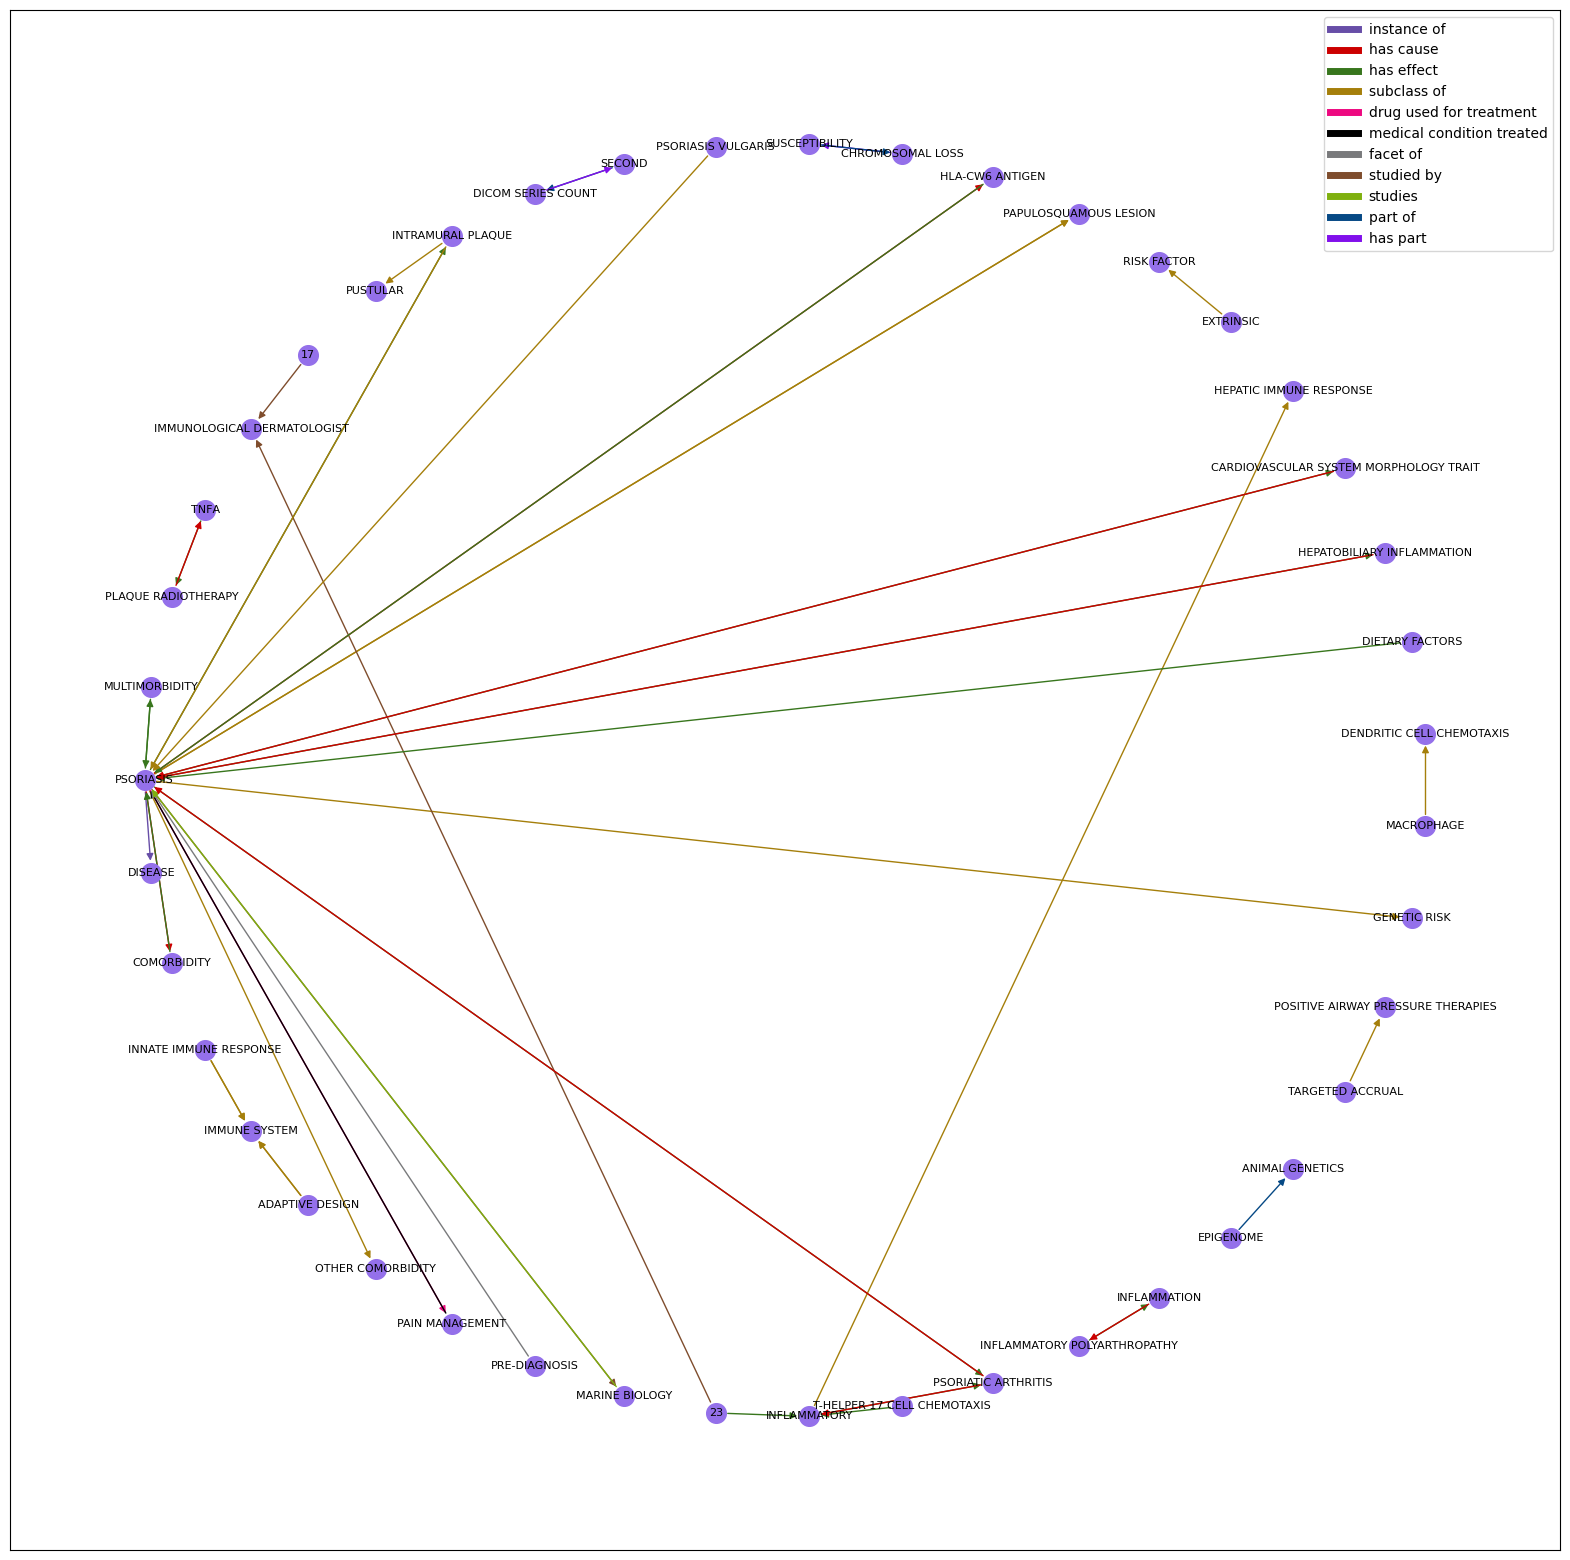

In [12]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.lines import Line2D
import networkx as ntx
def make_proxy(clr, mappable, **kwargs):
    return Line2D([0, 1], [0, 1], color=clr, **kwargs)

#for id-less set the identified entity as the id
relations.replace(['id-less'], [None], inplace=True)
relations['subject_id'] = relations['subject_id'].fillna(relations['subject_text'])
relations['object_id'] = relations['object_id'].fillna(relations['object_text'])

#bring all entities to upper case
relations = relations.applymap(lambda s:s.upper())
relations['relation'] = relations['relation'].apply(lambda s:s.lower())
relations['relation']=pd.Categorical(relations['relation'])


color_hex = [
    '#674ea7',
    '#cc0000',
    '#38761d',
    '#a57f0b',
    '#ed0980',
    '#000000',
    '#797a7c',
    '#7f4d2d',
    '#7fb00f',
    '#064985',
    '#8110eb'
]

#map relations to colors
color_map = dict(zip(relations['relation'].unique(), color_hex))
#create the list of edge colors
relations['edge_colors'] = relations["relation"].apply(lambda x: color_map[x])
graph = ntx.from_pandas_edgelist(relations, "subject_id", "object_id", edge_attr="edge_colors", create_using=ntx.MultiDiGraph())

## PLOT
plt.figure(figsize=(20, 20))
posn = ntx.shell_layout(graph)

colors = ntx.get_edge_attributes(graph,'edge_colors').values()

##add graph elements
h1 = ntx.draw_networkx_nodes(graph, pos=posn, node_color = '#9470ea', node_size = 200)
h2 = ntx.draw_networkx_edges(graph, pos=posn, width=1, edge_color=colors)
h3 = ntx.draw_networkx_labels(graph, pos=posn, font_size=8)

# generate proxies
proxies = [make_proxy(clr, h2, lw=5) for clr in color_map.values()]
#create legend labels
labels = color_map.keys()
plt.legend(proxies, labels)
